In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import stattools
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 6)
import numpy
from math import sqrt

In [51]:
import requests
import csv
import os
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

def get_load_data(date):
    url = 'http://www.delhisldc.org/Loaddata.aspx?mode='
    print('Scraping', date)
    resp = requests.get(url+date) # send a get request to the url, get response
    soup = BeautifulSoup(resp.text, 'lxml') # Yummy HTML soup
    table = soup.find('table', {'id':'ContentPlaceHolder3_DGGridAv'}) # get the table from html
    trs = table.findAll('tr') # extract all rows of the table
    if len(trs[1:])!=0: # no need to create csv file, if there's no data, for Aug month of 2017
        csv_filename = 'monthdata.csv'
        with open(csv_filename, 'a') as f:
            writer = csv.writer(f)
            count=0
            for tr in trs[1:]:
                time, delhi = tr.findChildren('font')[:2]
                writer.writerow([date+' '+time.text, delhi.text])
                count+=1
    if count != 288:
        print('Some of the load values are missing..')
    else:
        print('Done')

In [100]:
# date = date.split('/')
# date.reverse()
'-'.join(date)

'2018-10-27'

In [118]:
for i in range(31, 0, -1):
    yesterday = datetime.today() - timedelta(i)
    yesterday = yesterday.strftime('%d/%m/%Y')
    get_load_data(yesterday)    

Scraping 27/09/2018
Done
Scraping 28/09/2018
Done
Scraping 29/09/2018
Done
Scraping 30/09/2018
Done
Scraping 01/10/2018
Done
Scraping 02/10/2018
Done
Scraping 03/10/2018
Done
Scraping 04/10/2018
Done
Scraping 05/10/2018
Done
Scraping 06/10/2018
Done
Scraping 07/10/2018
Done
Scraping 08/10/2018
Done
Scraping 09/10/2018
Done
Scraping 10/10/2018
Done
Scraping 11/10/2018
Done
Scraping 12/10/2018
Done
Scraping 13/10/2018
Done
Scraping 14/10/2018
Done
Scraping 15/10/2018
Done
Scraping 16/10/2018
Done
Scraping 17/10/2018
Done
Scraping 18/10/2018
Done
Scraping 19/10/2018
Done
Scraping 20/10/2018
Done
Scraping 21/10/2018
Done
Scraping 22/10/2018
Done
Scraping 23/10/2018
Some of the load values are missing..
Scraping 24/10/2018
Done
Scraping 25/10/2018
Done
Scraping 26/10/2018
Done
Scraping 27/10/2018
Done


Scraping 27/10/2018
Done


In [119]:
!head monthdata.csv

27/09/2018 00:00,3426.820
27/09/2018 00:05,3398.530
27/09/2018 00:10,3376.950
27/09/2018 00:15,3356.010
27/09/2018 00:20,3345.170
27/09/2018 00:25,3313.630
27/09/2018 00:30,3314.760
27/09/2018 00:35,3303.790
27/09/2018 00:40,3289.300
27/09/2018 00:45,3277.190


In [105]:
!head delhi.csv

24/12/2017,00:00,1793.03
24/12/2017,00:05,1781.27
24/12/2017,00:10,1757.1
24/12/2017,00:15,1730.53
24/12/2017,00:20,1716.35
24/12/2017,00:25,1697.04
24/12/2017,00:30,1686.24
24/12/2017,00:35,1678.91
24/12/2017,00:40,1654.96
24/12/2017,00:45,1638.91


In [53]:
import pandas as pd

In [290]:
data = pd.read_csv('monthdata.csv', skiprows=[0], header=None, names=['datetime', 'load'], index_col=[0], parse_dates=[0], infer_datetime_format=True)

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8946 entries, 28/09/2018 00:00 to 28/10/2018 23:55
Data columns (total 1 columns):
load    8946 non-null object
dtypes: object(1)
memory usage: 459.8+ KB


In [291]:
data.shape

(8946, 1)

In [292]:
data['26/10/2018':].shape

KeyError: '26/10/2018'

In [294]:
delhi = pd.read_csv('delhi.csv', header = None, parse_dates=[[0,1]], infer_datetime_format=True)

In [295]:
delhi.head()

,0_1,2
0,2017-12-24 00:00:00,1793.03
1,2017-12-24 00:05:00,1781.27
2,2017-12-24 00:10:00,1757.10
3,2017-12-24 00:15:00,1730.53
4,2017-12-24 00:20:00,1716.35


In [70]:
delhi.columns = ['datetime', 'load']

In [71]:
delhi.index = delhi['datetime']

In [72]:
delhi = delhi.drop(columns = ['datetime'])

In [108]:
delhi.head()

,load
datetime,
2017-12-24 00:00:00,1793.03
2017-12-24 00:05:00,1781.27
2017-12-24 00:10:00,1757.10
2017-12-24 00:15:00,1730.53
2017-12-24 00:20:00,1716.35


In [109]:
delhi.shape

(69036, 1)

In [8]:
# delhi = delhi.apply(lambda x : (x-x.mean())/(x.max()-x.min()))

In [9]:
# (delhi[delhi.index.minute==30] or [delhi.index.minute==0])

In [130]:
data.head(1)

,load
datetime,
27/09/2018 00:00,3426.82


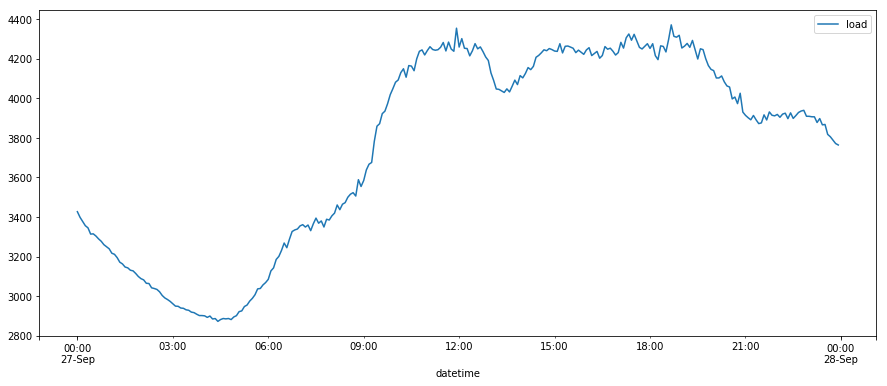

In [140]:
data['27/09/2018'].plot()
plt.rcParams['figure.figsize'] = (15, 6)
plt.show()

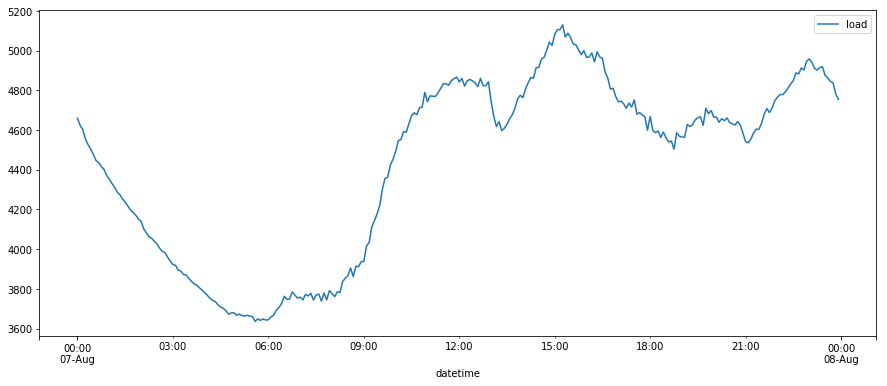

In [68]:
delhi['2018-08-07'].plot()
plt.rcParams['figure.figsize'] = (15, 6)
plt.show()

In [11]:
# r = delhi.rolling(window = 12*24)

In [12]:
# delhi['load'].plot(color = 'blue')
# r.mean()['load'].plot(color = 'red')

In [13]:
# delhi['load'].plot(color = 'blue')
# r.max()['load'].plot(color = 'red')

In [14]:
# delhi['load'].expanding(min_periods = 50).mean().plot()
# data['electricity_consumption'].expanding(min_periods = 720).mean().plot()

In [69]:
delhi.tail()

,load
datetime,
2018-08-21 23:35:00,5802.66
2018-08-21 23:40:00,5772.58
2018-08-21 23:45:00,5740.85
2018-08-21 23:50:00,5733.31
2018-08-21 23:55:00,5713.83


In [16]:
# plt.plot(delhi['load'][0:12*24])

In [17]:
# plt.plot(stattools.acf(delhi['load'], nlags = 12*24*3))

In [18]:
# plt.plot(stattools.pacf(delhi['load'], nlags = 12*24*4))

In [39]:
data = data.asfreq(freq='H', method='bfill')
delhi = delhi.asfreq(freq='H', method='bfill')

In [168]:
delhi.shape

(5784, 1)

In [141]:
# number of unique dates in the data
len(set(delhi.index.date))

241

In [145]:
delhi.tail()

,load
datetime,
2018-08-21 19:00:00,5031.97
2018-08-21 20:00:00,5263.41
2018-08-21 21:00:00,5245.19
2018-08-21 22:00:00,5629.48
2018-08-21 23:00:00,5850.43


In [148]:
delhi = delhi['2018-07-22':]

In [149]:
len(set(delhi.index.date))

31

In [21]:
# import itertools
# p=d=q =  range(0,2)
# pdq = list(itertools.product(p,d,q))
# print(pdq)

In [22]:
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [23]:
# delhi.index = pd.to_datetime(delhi.index)

In [72]:
delhi.shape

(120, 1)

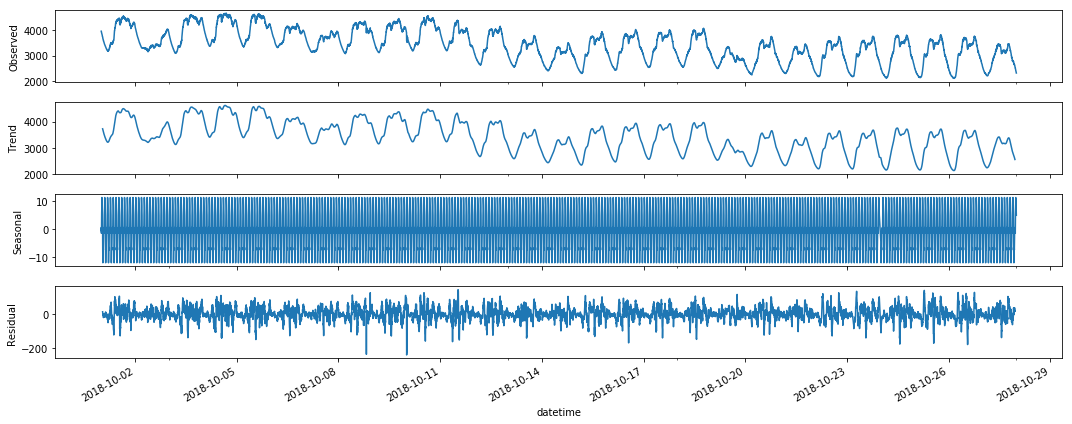

In [141]:
plt.rcParams['figure.figsize'] = (15, 6)
decompfreq = 24 #daily freq
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['10/2018':], freq=decompfreq, model='aditive')
result.plot()
plt.show()

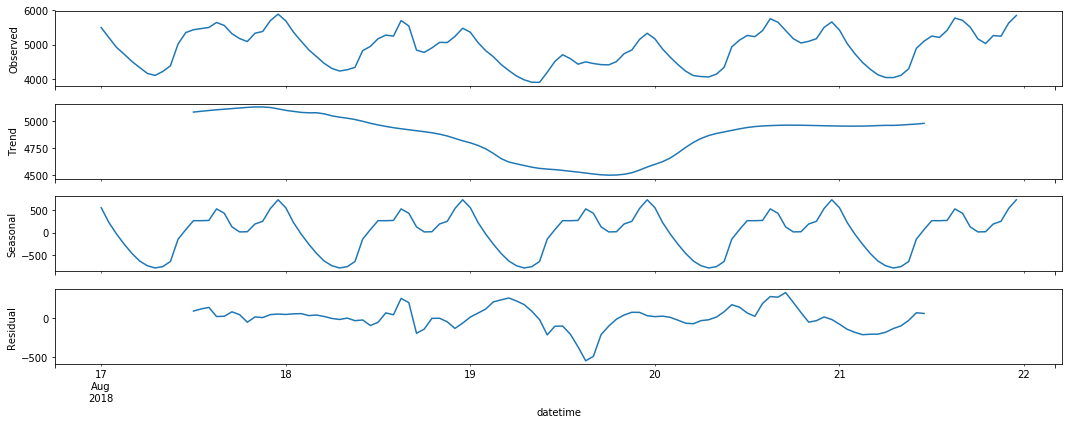

In [73]:
plt.rcParams['figure.figsize'] = (15, 6)
decompfreq = 24 #daily freq
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(delhi['2018-08':], freq=decompfreq, model='aditive')
result.plot()
plt.show()

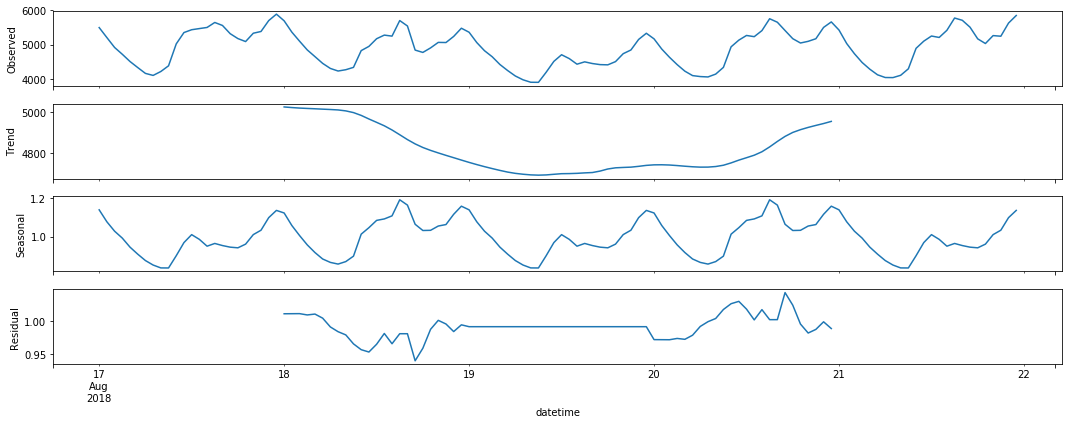

In [18]:
plt.rcParams['figure.figsize'] = (15, 6)
decompfreq = 48 #daily freq
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(delhi['2018-08':], freq=decompfreq, model='multiplicitive')
result.plot()
plt.show()

In [421]:
# sorted(text.split('\n'), key=lambda x: x.split('-')[-1])

In [26]:
# import warnings
# import statsmodels.api as sm
# warnings.filterwarnings("ignore") # specify to ignore warning messages

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(delhi,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             results = mod.fit()

#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             print("nhi")
#             continue

In [420]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(delhi, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

ModuleNotFoundError: No module named 'pyramid.arima'

In [418]:
import pyramid

<module 'pyramid' from '/home/eee/ug/15084015/miniconda3/envs/ML/lib/python3.7/site-packages/pyramid/__init__.py'>

In [146]:

delhi.shape

CPU times: user 13 µs, sys: 6 µs, total: 19 µs
Wall time: 40.3 µs


(69036, 1)

In [ ]:
%%time
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(0,1,1),
                                seasonal_order=(0,2,2,24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])
'''For fitting on 30days of hourly data this takes , and 6500% CPU'''

CPU times: user 10 µs, sys: 5 µs, total: 15 µs
Wall time: 40.3 µs


/home/eee/ug/15084015/miniconda3/envs/ML/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [151]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               load   No. Observations:                  744
Model:             SARIMAX(0, 1, 1)x(0, 2, 2, 24)   Log Likelihood               -3891.766
Date:                            Sun, 28 Oct 2018   AIC                           7791.532
Time:                                    13:22:06   BIC                           7809.409
Sample:                                07-22-2018   HQIC                          7798.469
                                     - 08-21-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3580      0.027     13.505      0.000       0.306       0.410
ma.S.L24      -1.9868      0.039    -50.818      0.000      -2.063      -1.910
ma.S.L48       1.0000      0.045     22.061      0.000       0.911       1.089
sigma2      7917.3596   1.06e-05   7.49e+08      0.000    7917.360    7917.360
===================================================================================
Ljung-Box (Q):                       61.58   Jarque-Bera (JB):               373.36
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                            -0.53
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.34e+23. Standard errors may be unstable.
"""

In [7]:
from statsmodels.tsa.arima_model import ARIMAResults

In [8]:
import statsmodels
statsmodels.__version__ 

'0.9.0'

In [152]:
results.save('model1.pkl')

In [24]:
loaded = ARIMAResults.load('ARIMA_month_model.pkl')

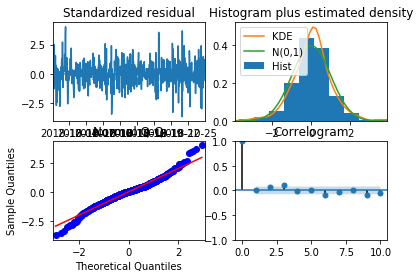

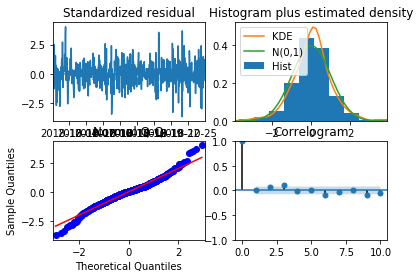

In [25]:
loaded.plot_diagnostics()

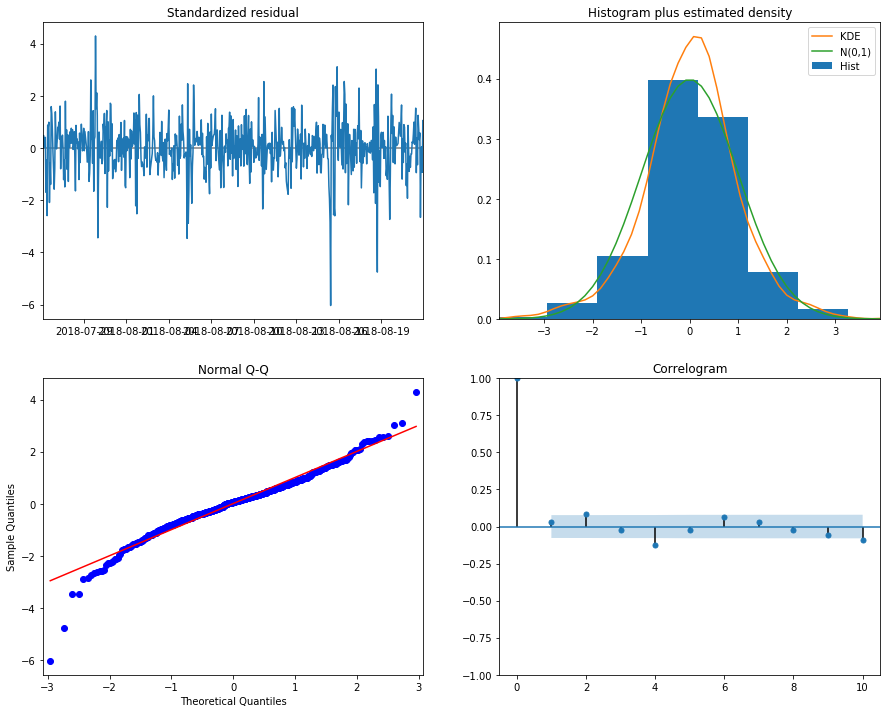

In [155]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [179]:
results.get_prediction?

In [26]:
data.tail()

,load
datetime,
2018-10-27 23:35:00,2402.19
2018-10-27 23:40:00,2371.37
2018-10-27 23:45:00,2348.32
2018-10-27 23:50:00,2336.29
2018-10-27 23:55:00,2316.86


In [27]:
pred = loaded.get_prediction(start=pd.to_datetime('2018-10-28 00:00:00'), end=pd.to_datetime('2018-10-28 23:00:00'), dynamic=False)
pred_ci = pred.conf_int()

In [28]:
pred.predicted_mean.shape

(24,)

In [38]:
data['27/10/2018'].shape

(288, 1)

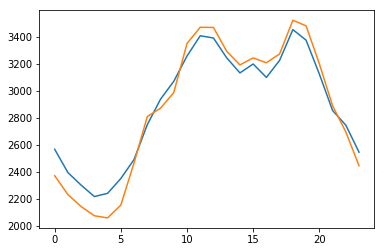

In [40]:
plt.plot(range(24), data['27/10/2018'])
plt.plot(range(24), pred.predicted_mean)#.plot(figsize=(15,6))
plt.show()

In [75]:
pred.predicted_mean.to_csv('arima_pred.csv', index_label='datetime', header=['load'])

In [76]:
data

,load
datetime,
datetime,load
2018-09-28 00:00:00,3742.89
2018-09-28 01:00:00,3496.01
2018-09-28 02:00:00,3329.21
2018-09-28 03:00:00,3197.15
2018-09-28 04:00:00,3101.24
2018-09-28 05:00:00,3078.06
2018-09-28 06:00:00,3285.45
2018-09-28 07:00:00,3494.94


In [52]:
day = datetime.today() - timedelta(30)

In [58]:
data.shape

(744, 1)

In [59]:
data = data[day.strftime('%d/%m/%Y'):]

In [63]:
data.to_csv('monthdata.csv', columns=None)

In [23]:
delhi.tail()

NameError: name 'delhi' is not defined

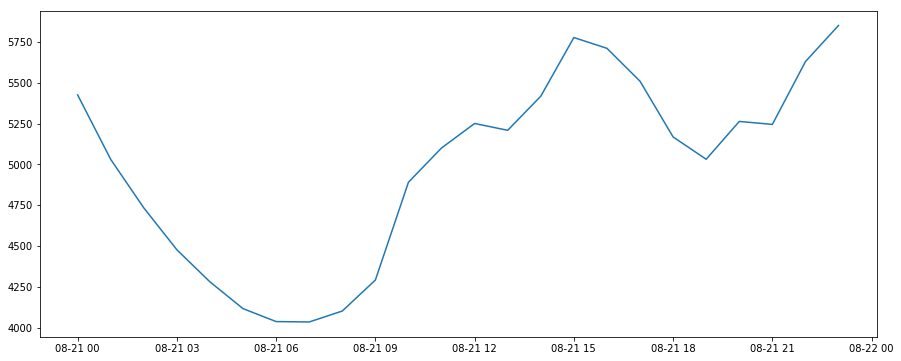

In [174]:
plt.plot(delhi['2018-08-21'])

In [176]:
pred.predicted_mean

2018-08-22    5649.586455
Freq: H, dtype: float64

In [187]:
plt.plot?

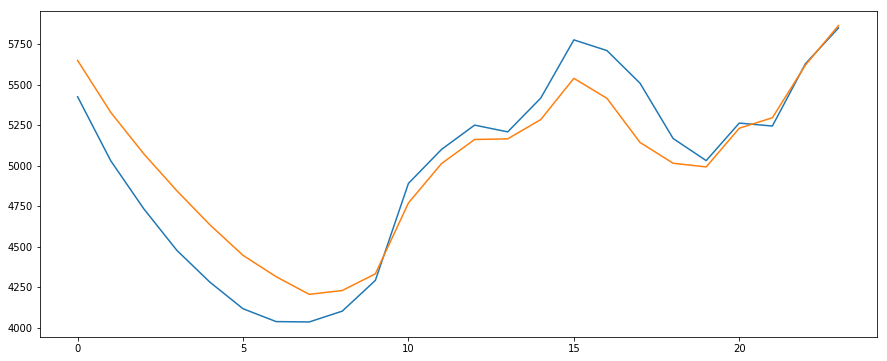

In [189]:
plt.plot(range(24), delhi['2018-08-21'])
plt.plot(range(24), pred.predicted_mean)#.plot(figsize=(15,6))
plt.show()

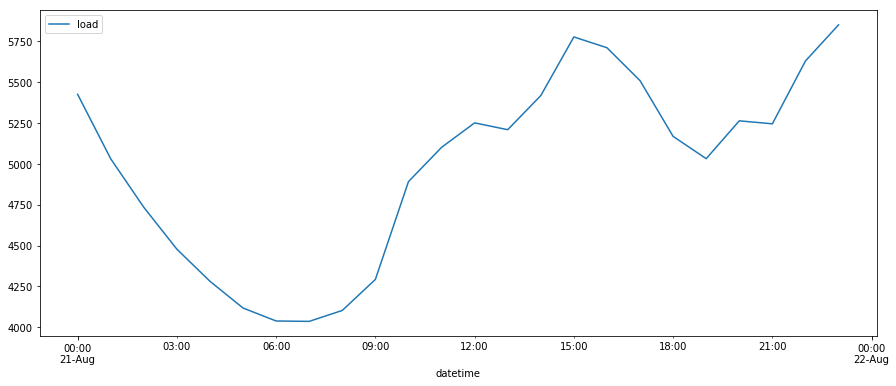

In [85]:
ax = delhi['2018-08-21':].plot(figsize=(15,6))

In [86]:
pr = pred.predicted_mean
axr = delhi['2018-08-21':]

In [63]:
# print(pr)

In [64]:
# print(axr)

In [65]:
# ax

In [66]:
# ax = delhi['2018-08-01':'2018-08-02'].plot(label='observed', figsize=(15,6))
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

# # ax.fill_between(pred_ci.index,
# #                 pred_ci.iloc[:, 0],
# #                 pred_ci.iloc[:, 1], color='k', alpha=.2)

# ax.set_xlabel('Date')
# ax.set_ylabel('Electricity Production')
# plt.legend()

# plt.show()

In [67]:
# type(pr), type(axr)

In [45]:
pred.predicted_mean - numpy.squeeze(delhi['2018-08-21':])

datetime
2018-08-21 00:00:00   -5431.196736
2018-08-21 01:00:00   -5036.413804
2018-08-21 02:00:00   -4739.511659
2018-08-21 03:00:00   -4483.035169
2018-08-21 04:00:00   -4286.424075
2018-08-21 05:00:00   -4122.607810
2018-08-21 06:00:00   -4043.337895
2018-08-21 07:00:00   -4040.936234
2018-08-21 08:00:00   -4107.953184
2018-08-21 09:00:00   -4297.729721
2018-08-21 10:00:00   -4896.561318
2018-08-21 11:00:00   -5106.376316
2018-08-21 12:00:00   -5256.390262
2018-08-21 13:00:00   -5214.683170
2018-08-21 14:00:00   -5423.418943
2018-08-21 15:00:00   -5782.623318
2018-08-21 16:00:00   -5716.536227
2018-08-21 17:00:00   -5514.991903
2018-08-21 18:00:00   -5173.711180
2018-08-21 19:00:00   -5037.278554
2018-08-21 20:00:00   -5268.770248
2018-08-21 21:00:00   -5250.630262
2018-08-21 22:00:00   -5635.268161
2018-08-21 23:00:00   -5856.386482
Freq: H, dtype: float64

In [69]:
axr.head()

,load
datetime,
2018-08-21 00:00:00,5425.76
2018-08-21 00:30:00,5185.79
2018-08-21 01:00:00,5031.29
2018-08-21 01:30:00,4881.22
2018-08-21 02:00:00,4734.64


In [46]:
from math import sqrt 
print(sqrt(((pred.predicted_mean - numpy.squeeze(delhi['2018-08-21':]))**2).mean()))

5021.457622825617


In [47]:
import numpy
y_forecasted = pred.predicted_mean
y_truth = delhi['2018-08-21':]
# print(y_truth.values)
# Compute the mean square error
mse = ((numpy.squeeze(y_forecasted.values) - numpy.squeeze(y_truth.values)) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 25215036.66


In [72]:
# hlwa = results.get_forecast(480)

In [73]:
# delhi = delhi.asfreq(freq='300S', method='bfill')

In [49]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps = 48)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [59]:
pred_ci.head()

,lower load,upper load
2018-08-22 00:00:00,-9439.959146,9428.544697
2018-08-22 01:00:00,-9439.544299,9428.959543
2018-08-22 02:00:00,-9439.232308,9429.271535
2018-08-22 03:00:00,-9438.962796,9429.541046
2018-08-22 04:00:00,-9438.756193,9429.747650


In [60]:
pred_ci.shape

(48, 2)

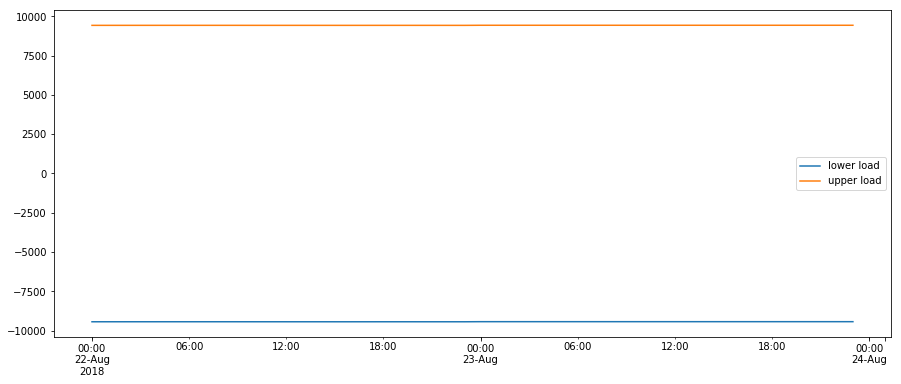

In [61]:
pred_ci.plot()

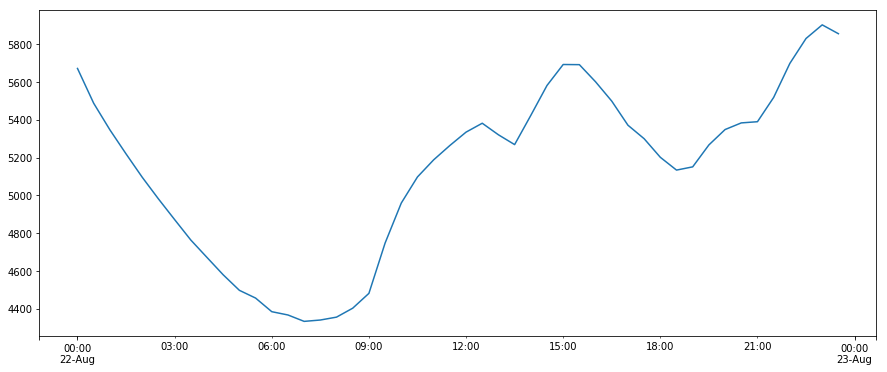

In [77]:
pred_uc.predicted_mean['2018-08-22'].plot(label='Forecast')

In [120]:
prediction = pred_uc.predicted_mean['2018-08-22']

In [111]:
d = pd.read_csv('22-08-2018.csv', header = None, parse_dates=[[0]], infer_datetime_format=True)

In [112]:
d.columns = ['datetime','load' ]

In [113]:
d.index = d['datetime']

In [114]:
d = d.drop(columns = ['datetime'])

In [119]:
actual = d.asfreq(freq='30T', method='bfill')

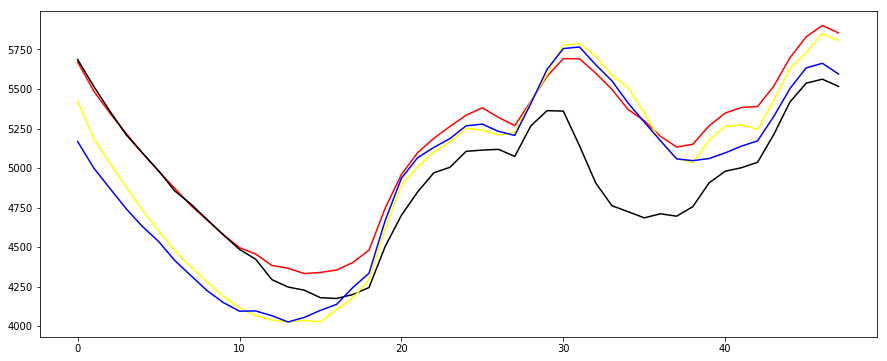

In [123]:
plt.plot(prediction.values, color='red', label='prediction')
plt.plot(actual.values, color='black', label='actual')
plt.plot(delhi['2018-08-21'].values, color='yellow')
plt.plot(delhi['2018-08-20'].values, color='blue')

In [102]:
pred_data = pd.read_csv('arima_pred.csv', header=None, names=['datetime', 'load'], index_col=[0], parse_dates=[0], infer_datetime_format=True)

In [112]:
1/24

0.041666666666666664

In [113]:
pred_data.asfreq?

Signature: pred_data.asfreq(freq, method=None, how=None, normalize=False, fill_value=None)
Docstring:
Convert TimeSeries to specified frequency.

Optionally provide filling method to pad/backfill missing values.

Returns the original data conformed to a new index with the specified
frequency. ``resample`` is more appropriate if an operation, such as
summarization, is necessary to represent the data at the new frequency.

Parameters
----------
freq : DateOffset object, or string
method : {'backfill'/'bfill', 'pad'/'ffill'}, default None
    Method to use for filling holes in reindexed Series (note this
    does not fill NaNs that already were present):

    * 'pad' / 'ffill': propagate last valid observation forward to next
      valid
    * 'backfill' / 'bfill': use NEXT valid observation to fill
how : {'start', 'end'}, default end
    For PeriodIndex only, see PeriodIndex.asfreq
normalize : bool, default False
    Whether to reset output index to midnight
fill_value: scalar, optional


In [120]:
pred_data = pred_data.asfreq(freq='5Min', method='bfill')
pred_data.to_csv('arima_pred.csv', index_label='datetime', header=['load'])


In [125]:
data = pd.read_csv('monthdata.csv', header=None, names=['datetime', 'load'], index_col=[0], parse_dates=[0], infer_datetime_format=True)

In [126]:
data.head()

,load
datetime,
2018-09-28 00:00:00,3742.89
2018-09-28 01:00:00,3496.01
2018-09-28 02:00:00,3329.21
2018-09-28 03:00:00,3197.15
2018-09-28 04:00:00,3101.24


In [202]:
pd.read_csv?

Signature: pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
Docstring:
Read CSV (comma-separated) file into DataFrame

Also supports optionally iterating or breaking of the file
into chunks.



In [372]:
!head monthdata.csv

28/09/2018 00:00,3742.890
28/09/2018 00:05,3688.820
28/09/2018 00:10,3679.720
28/09/2018 00:15,3664.890
28/09/2018 00:20,3638.680
28/09/2018 00:25,3616.820
28/09/2018 00:30,3601.250
28/09/2018 00:35,3566.840
28/09/2018 00:40,3568.250
28/09/2018 00:45,3547.410


In [400]:
# load the month long data
data = pd.read_csv('monthdata.csv', header=None, index_col=['datetime'], names=['datetime', 'load'], parse_dates=['datetime'], infer_datetime_format=True)


In [401]:
data.head()

,load
datetime,
2018-09-29 00:00:00,3942.27
2018-09-29 00:05:00,3911.38
2018-09-29 00:10:00,3923.22
2018-09-29 00:15:00,3877.00
2018-09-29 00:20:00,3833.22


In [405]:
set(data.index.date)

{datetime.date(2018, 9, 29),
 datetime.date(2018, 9, 30),
 datetime.date(2018, 10, 1),
 datetime.date(2018, 10, 2),
 datetime.date(2018, 10, 3),
 datetime.date(2018, 10, 4),
 datetime.date(2018, 10, 5),
 datetime.date(2018, 10, 6),
 datetime.date(2018, 10, 7),
 datetime.date(2018, 10, 8),
 datetime.date(2018, 10, 9),
 datetime.date(2018, 10, 10),
 datetime.date(2018, 10, 11),
 datetime.date(2018, 10, 12),
 datetime.date(2018, 10, 13),
 datetime.date(2018, 10, 14),
 datetime.date(2018, 10, 15),
 datetime.date(2018, 10, 16),
 datetime.date(2018, 10, 17),
 datetime.date(2018, 10, 18),
 datetime.date(2018, 10, 19),
 datetime.date(2018, 10, 20),
 datetime.date(2018, 10, 21),
 datetime.date(2018, 10, 22),
 datetime.date(2018, 10, 23),
 datetime.date(2018, 10, 24),
 datetime.date(2018, 10, 25),
 datetime.date(2018, 10, 26),
 datetime.date(2018, 10, 27)}

In [406]:
data[:'27/10/2018'].tail()

,load
datetime,
2018-10-27 23:35:00,2402.19
2018-10-27 23:40:00,2371.37
2018-10-27 23:45:00,2348.32
2018-10-27 23:50:00,2336.29
2018-10-27 23:55:00,2316.86


In [398]:
data[:'27/10/2018'].to_csv('monthdata.csv', header=False)

In [397]:
data.to_csv('monthdata.csv', header=False)

In [399]:
!tail monthdata.csv

2018-10-27 23:10:00,2520.48
2018-10-27 23:15:00,2490.5
2018-10-27 23:20:00,2478.54
2018-10-27 23:25:00,2433.26
2018-10-27 23:30:00,2422.02
2018-10-27 23:35:00,2402.19
2018-10-27 23:40:00,2371.37
2018-10-27 23:45:00,2348.32
2018-10-27 23:50:00,2336.29
2018-10-27 23:55:00,2316.86


In [384]:
data.index

DatetimeIndex(['2018-09-28 00:00:00', '2018-09-28 00:05:00',
               '2018-09-28 00:10:00', '2018-09-28 00:15:00',
               '2018-09-28 00:20:00', '2018-09-28 00:25:00',
               '2018-09-28 00:30:00', '2018-09-28 00:35:00',
               '2018-09-28 00:40:00', '2018-09-28 00:45:00',
               ...
               '2018-10-28 23:10:00', '2018-10-28 23:15:00',
               '2018-10-28 23:20:00', '2018-10-28 23:25:00',
               '2018-10-28 23:30:00', '2018-10-28 23:35:00',
               '2018-10-28 23:40:00', '2018-10-28 23:45:00',
               '2018-10-28 23:50:00', '2018-10-28 23:55:00'],
              dtype='datetime64[ns]', name='datetime', length=8916, freq=None)

In [378]:
data['28/09/2018'].head()

,load
datetime,
2018-09-28 00:00:00,3742.89
2018-09-28 00:05:00,3688.82
2018-09-28 00:10:00,3679.72
2018-09-28 00:15:00,3664.89
2018-09-28 00:20:00,3638.68


In [407]:
data = pd.read_csv('monthdata.csv', header=None, index_col=['datetime'], names=['datetime', 'load'], parse_dates=['datetime'], infer_datetime_format=True)


In [410]:
data.shape

(8628, 1)

In [411]:
data = data.asfreq(freq='15Min', method='bfill')  # sample the data in hourly manner


In [412]:
data.head()

,load
datetime,
2018-09-29 00:00:00,3942.27
2018-09-29 00:15:00,3877.00
2018-09-29 00:30:00,3816.82
2018-09-29 00:45:00,3770.52
2018-09-29 01:00:00,3735.92


In [2]:
!jupyter nbconvert --to script delhi.ipynb

[NbConvertApp] Converting notebook delhi.ipynb to script
[NbConvertApp] Writing 73498 bytes to delhi.py
